100%|██████████████████████████████████████████████████████████████████████████████████| 80/80 [00:07<00:00, 10.49it/s]


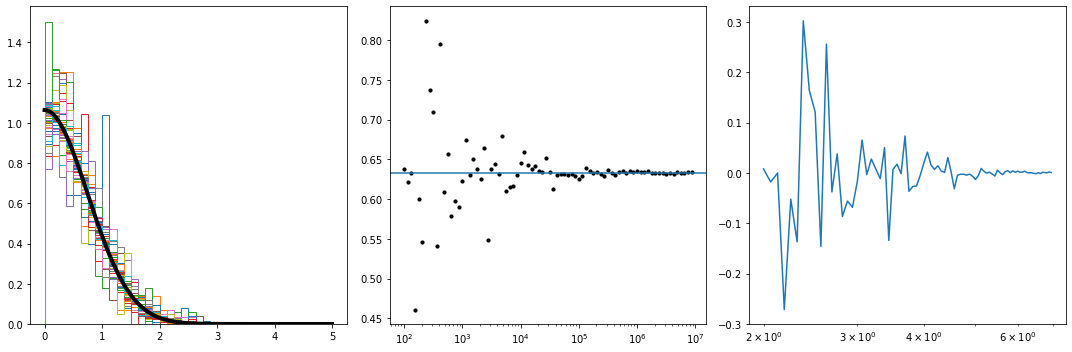

(array([ 1.,  0.,  0.,  3.,  1.,  3., 15., 48.,  4.,  1.,  1.,  1.,  0.,
         1.,  1.]),
 array([-0.27159437, -0.23332126, -0.19504816, -0.15677505, -0.11850195,
        -0.08022884, -0.04195573, -0.00368263,  0.03459048,  0.07286358,
         0.11113669,  0.1494098 ,  0.1876829 ,  0.22595601,  0.26422911,
         0.30250222]),
 <BarContainer object of 15 artists>)

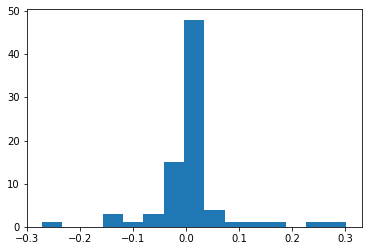

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

sigma = 0.75
pxfx = lambda x: x**3 * np.exp(-x**2/2/sigma**2)
# Check that \int_{0}^{+\infty}{pxfx} == 2 \sigma**4

p = lambda x: 2*stats.norm(loc=0, scale=sigma).pdf(x) #/ np.sqrt(2*np.pi*sigma**2)
f = lambda x: x**3 * np.sqrt(2 * np.pi * sigma**2) * 0.5

fig, axs = plt.subplots(1, 3, tight_layout=True, figsize=(15, 5))
x = np.linspace(0, 10, 1000)
axs[0].plot(x[x<5], p(x[x<5]), lw=4, c='k', zorder=0)
#plt.plot(-x, p(-x))

N = np.arange(2, 7, 0.125/2)#, dtype=int)
#js = np.argwhere( 10**N % 10 == 0 )
from tqdm import tqdm
I = []#np.zeros(len(N))

for n in tqdm(N):
    #break
    xi = abs( stats.norm(0, sigma).rvs( int( 10**n )) )
    INT = 1/int( 10**n ) * np.sum( f(xi) )
    #if 10**n in 10**N[js] : 
    axs[0].hist(xi, histtype='step', density=True, bins=np.arange(0, 5+0.125, 0.125), zorder=-1)
    axs[1].scatter(10**n, INT, c='k', s=10)
    I.append(INT)
    # print(I, 2*sigma**4, I-2*sigma**4)
axs[1].axhline(2*sigma**4)
axs[1].set_xscale('log')

axs[2].plot(N, ( np.array(I)-2*sigma**4)/(2*sigma**4) )
#for j in js:
#    j = int(j)
#    axs[2].hist(I[:j], bins=np.linspace(2*sigma**4-sigma/2, 2*sigma**4+sigma/2, 30), histtype='step', density=True, label='N < '+str(int(10**N[j])))
#    axs[2].axvline(2*sigma**4, c='k', ls='--', lw=2)
#axs[2].set_xlim([2*sigma**4-0.5*sigma, 2*sigma**4+0.5*sigma])
axs[2].set_xscale('log')

plt.show()
plt.hist( ( np.array(I)-2*sigma**4)/(2*sigma**4), bins=15  )
#axs[2].legend(loc='upper left')